<a href="https://colab.research.google.com/github/AdibaHasin/Governance-data-analysis/blob/main/Governance_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#load the governance dataset
import pandas as pd

file_path = '/content/wgidataset_with_sourcedata.xlsx'
data = pd.ExcelFile(file_path) #opening and cretaing an interface to the file

print(data.sheet_names)

#load the sheet in to a dataframe
df_cleaned = data.parse('Sheet1')
df_cleaned.head()


['Sheet1']


,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,...,rsf,tpr,vab,vdm,wbs,wcy,wjp,wmo,scalemean,scalesd
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,..,0.295084,..,..,..,0,0.013374,0.93648
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,...,..,..,..,0.31559,..,..,..,0.25,0.013374,0.93648
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,...,..,..,..,0.368832,..,..,..,0.25,0.013374,0.93648
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,...,..,..,..,..,..,..,..,..,0.013374,0.93648
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,...,..,..,..,..,..,..,..,0.875,0.013374,0.93648


# Cleaning the dataset

In [5]:
#replace missing values with 'NaN'
df_cleaned.replace('', pd.NA, inplace=True)
df_cleaned.head()

#drop columns with more than 80% missing values
threshold = 0.8
columns_to_drop = df_cleaned.columns[df_cleaned.isna().mean() > threshold]
df_cleaned.drop(columns=columns_to_drop, inplace=True)
df_cleaned.head()

#drop rows with missing critical values
df_cleaned.dropna(subset=['countryname', 'year', 'estimate'], inplace=True)
df_cleaned.head()


,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,...,rsf,tpr,vab,vdm,wbs,wcy,wjp,wmo,scalemean,scalesd
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,..,0.295084,..,..,..,0,0.013374,0.93648
1,ALBcc1996,ALB,Albania,1996,cc,-0.893903,0.315914,3,19.354839,2.688172,...,..,..,..,0.31559,..,..,..,0.25,0.013374,0.93648
2,DZAcc1996,DZA,Algeria,1996,cc,-0.566741,0.262077,4,33.333332,16.666666,...,..,..,..,0.368832,..,..,..,0.25,0.013374,0.93648
3,ASMcc1996,ASM,American Samoa,1996,cc,..,..,..,..,..,...,..,..,..,..,..,..,..,..,0.013374,0.93648
4,ADOcc1996,ADO,Andorra,1996,cc,1.318143,0.480889,1,87.096771,72.043015,...,..,..,..,..,..,..,..,0.875,0.013374,0.93648


# Load GDP dataset

In [9]:
gdp_file_path = '/content/Download-GDPcurrent-NCU-countries.xlsx'
gdp_data = pd.ExcelFile(gdp_file_path)

print (gdp_data.sheet_names)

#load the sheet in to a dataframe
df_gdp = gdp_data.parse('Download-GDPcurrent-NCU-countri')
df_gdp.head()


['Download-GDPcurrent-NCU-countri', 'Download-Footnotes-current']


,GDP/breakdown at current prices in National currency (all countries),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CountryID,Country,Currency,IndicatorName,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,...,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03
2,4,Afghanistan,Afghani,Final consumption expenditure,76097244.0,82197023.0,69497573.0,73697424.0,89296879.0,97796585.0,...,1.213178e+12,1.154152e+12,1.165048e+12,1.249789e+12,1.265019e+12,1.501280e+12,1.662108e+12,1.756194e+12,1.373045e+12,1.533160e+12
3,4,Afghanistan,Afghani,Household consumption expenditure (including N...,70967106.0,76655665.0,64812356.0,68729071.0,83276881.0,91203574.0,...,9.737629e+11,9.053795e+11,9.152604e+11,9.702025e+11,9.937284e+11,1.217000e+12,1.338629e+12,1.416826e+12,1.107016e+12,1.252786e+12
4,4,Afghanistan,Afghani,General government final consumption expenditure,5130138.0,5541358.0,4685217.0,4968352.0,6019998.0,6593011.0,...,2.394148e+11,2.487723e+11,2.497878e+11,2.795870e+11,2.712908e+11,2.842798e+11,3.234784e+11,3.393690e+11,2.660288e+11,2.803736e+11


# cleaning GDP dataset

In [14]:
#skipping first 2 rows
gdp_df_cleaned = gdp_data.parse('Download-GDPcurrent-NCU-countri', skiprows=2)

#rename column based on the second rows of the column
gdp_df_cleaned.columns = gdp_data.parse('Download-GDPcurrent-NCU-countri').iloc[1]

gdp_df_cleaned.head()

1,CountryID,Country,Currency,IndicatorName,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,...,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
0,4,Afghanistan,Afghani,Final consumption expenditure,76097244.0,82197023.0,69497573.0,73697424.0,89296879.0,97796585.0,...,1.213178e+12,1.154152e+12,1.165048e+12,1.249789e+12,1.265019e+12,1.501280e+12,1.662108e+12,1.756194e+12,1.373045e+12,1.533160e+12
1,4,Afghanistan,Afghani,Household consumption expenditure (including N...,70967106.0,76655665.0,64812356.0,68729071.0,83276881.0,91203574.0,...,9.737629e+11,9.053795e+11,9.152604e+11,9.702025e+11,9.937284e+11,1.217000e+12,1.338629e+12,1.416826e+12,1.107016e+12,1.252786e+12
2,4,Afghanistan,Afghani,General government final consumption expenditure,5130138.0,5541358.0,4685217.0,4968352.0,6019998.0,6593011.0,...,2.394148e+11,2.487723e+11,2.497878e+11,2.795870e+11,2.712908e+11,2.842798e+11,3.234784e+11,3.393690e+11,2.660288e+11,2.803736e+11
3,4,Afghanistan,Afghani,Gross capital formation,4299850.0,4499842.0,4699836.0,5699800.0,8499703.0,10399636.0,...,1.653525e+11,1.600561e+11,1.657882e+11,1.582441e+11,1.796258e+11,1.938693e+11,1.892456e+11,1.758400e+11,1.624859e+11,2.139298e+11
4,4,Afghanistan,Afghani,Gross fixed capital formation (including Acqui...,4299850.0,4499842.0,4699836.0,5699800.0,8499703.0,10399636.0,...,1.653525e+11,1.600561e+11,1.657882e+11,1.582441e+11,1.796258e+11,1.938693e+11,1.892456e+11,1.758400e+11,1.624859e+11,2.139298e+11


In [28]:
#reshape from wide to long format
gdp_long = gdp_df_cleaned.melt(
    id_vars=['Country'],
    var_name='Year',
    value_name='GDP'

)
#rename country to countryname
gdp_long.rename(columns={'Country': 'countryname'}, inplace=True)
gdp_long.rename(columns={'Year': 'year'}, inplace=True)

#convert year to numeric and drop invalid entries
gdp_long['year'] = pd.to_numeric(gdp_long['year'], errors='coerce')
gdp_long['GDP'] = pd.to_numeric(gdp_long['GDP'], errors='coerce')

gdp_long.dropna(subset=['year', 'GDP'], inplace=True)
gdp_long['year'] = gdp_long['year'].astype(int)


gdp_long.head()


,countryname,year,GDP
11145,Afghanistan,1970,76097244.0
11146,Afghanistan,1970,70967106.0
11147,Afghanistan,1970,5130138.0
11148,Afghanistan,1970,4299850.0
11149,Afghanistan,1970,4299850.0


# merge the 2 datasets

In [29]:
merged_df = pd.merge(df_cleaned, gdp_long, on=['countryname', 'year'], how='inner')
merged_df.head()

,codeindyr,code,countryname,year,indicator,estimate,stddev,nsource,pctrank,pctranklower,...,tpr,vab,vdm,wbs,wcy,wjp,wmo,scalemean,scalesd,GDP
0,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,0.295084,..,..,..,0,0.013374,0.93648,8.777063e+09
1,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,0.295084,..,..,..,0,0.013374,0.93648,8.185800e+09
2,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,0.295084,..,..,..,0,0.013374,0.93648,5.912635e+08
3,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,0.295084,..,..,..,0,0.013374,0.93648,9.892942e+08
4,AFGcc1996,AFG,Afghanistan,1996,cc,-1.291705,0.340507,2,4.301075,0,...,..,..,0.295084,..,..,..,0,0.013374,0.93648,9.892942e+08


# 1. Are higher GDP values associated with better governance scores?
Governance and GDP are not strongly correlated in the dataset. This implies that economic size alone doesn't determine governance quality.

# 2. Which regions or countries deviate significantly from the trend?
- Chile, US, Somalia


In [30]:
merged_df.info()
merged_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432372 entries, 0 to 432371
Data columns (total 49 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   codeindyr     432372 non-null  object 
 1   code          432372 non-null  object 
 2   countryname   432372 non-null  object 
 3   year          432372 non-null  int64  
 4   indicator     432372 non-null  object 
 5   estimate      432372 non-null  object 
 6   stddev        432372 non-null  object 
 7   nsource       432372 non-null  object 
 8   pctrank       432372 non-null  object 
 9   pctranklower  432372 non-null  object 
 10  pctrankupper  432372 non-null  object 
 11  adb           432372 non-null  object 
 12  afr           432372 non-null  object 
 13  asd           432372 non-null  object 
 14  bps           432372 non-null  object 
 15  bti           432372 non-null  object 
 16  ccr           432372 non-null  object 
 17  ebr           432372 non-null  object 
 18  eiu 

,year,scalemean,scalesd,GDP
count,432372.000000,432372.000000,432372.000000,4.323720e+05
mean,2010.281619,0.018371,0.959430,2.868368e+13
std,7.328765,0.041562,0.016242,3.712218e+14
min,1996.000000,-0.089268,0.922920,-7.675524e+13
25%,2005.000000,-0.015034,0.948162,3.775192e+09
50%,2011.000000,0.019600,0.960633,6.693568e+10
75%,2017.000000,0.054746,0.972708,8.705870e+11
max,2022.000000,0.079227,0.988251,1.958845e+16


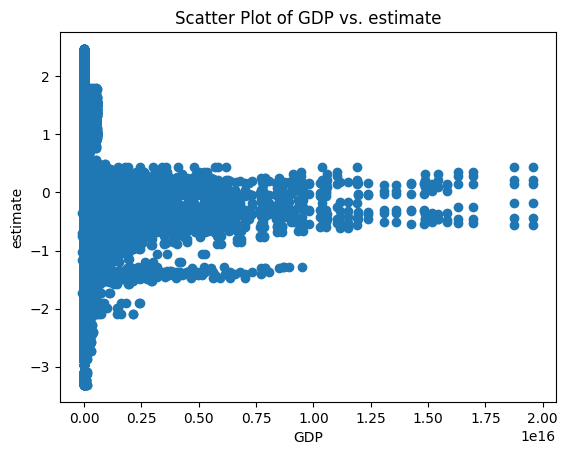

In [32]:
import matplotlib.pyplot as plt
merged_df.replace({'..': None}, inplace=True)

plt.scatter(merged_df['GDP'], merged_df['estimate'])
plt.xlabel('GDP')
plt.ylabel('estimate')
plt.title('Scatter Plot of GDP vs. estimate')
plt.show()

# normalise GDP with log transform

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


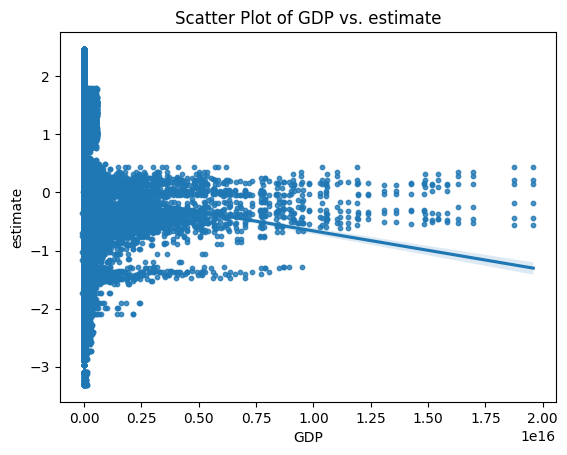

In [34]:
import numpy as np
merged_df['estimate'] = pd.to_numeric(merged_df['estimate'], errors='coerce')

merged_df['log_GDP'] = np.log1p(merged_df['GDP'])
import seaborn as sns


sns.regplot(x='GDP', y='estimate', data=merged_df, scatter_kws={'s': 10})
plt.title('Scatter Plot of GDP vs. estimate')
plt.show()


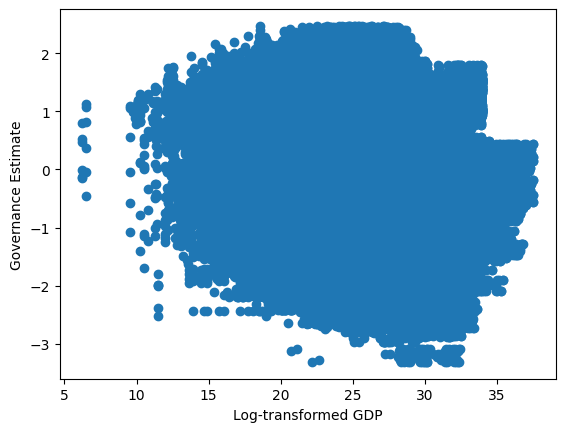

In [37]:
import numpy as np
merged_df['log_GDP'] = np.log1p(merged_df['GDP'])
merged_df = merged_df[merged_df['GDP'] > 0]  # Remove zero or negative GDP
plt.scatter(merged_df['log_GDP'], merged_df['estimate'])
plt.xlabel('Log-transformed GDP')
plt.ylabel('Governance Estimate')
plt.show()



In [38]:
merged_df[['log_GDP', 'estimate']].corr()


,log_GDP,estimate
log_GDP,1.000000,-0.217914
estimate,-0.217914,1.000000


from matplotlib import pyplot as plt
_df_0['log_GDP'].plot(kind='hist', bins=20, title='log_GDP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['estimate'].plot(kind='hist', bins=20, title='estimate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='log_GDP', y='estimate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['estimate']
  ys = series['log_GDP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('estimate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('estimate')
_ = plt.ylabel('log_GDP')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['estimate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'estimate'}, axis=1)
              .sort_values('estimate', ascending=True))
  xs = counted['estimate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('estimate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('estimate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['log_GDP'].plot(kind='line', figsize=(8, 4), title='log_GDP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['estimate'].plot(kind='line', figsize=(8, 4), title='estimate')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-40-90be30167cfd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['GDP_bracket'] = merged_df.apply(categorize_gdp, axis=1)
<ipython-input-40-90be30167cfd>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['GDP_bracket'] = merged_df.apply(categorize_gdp, axis=1)
<ipython-input-40-90be30167cfd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effe

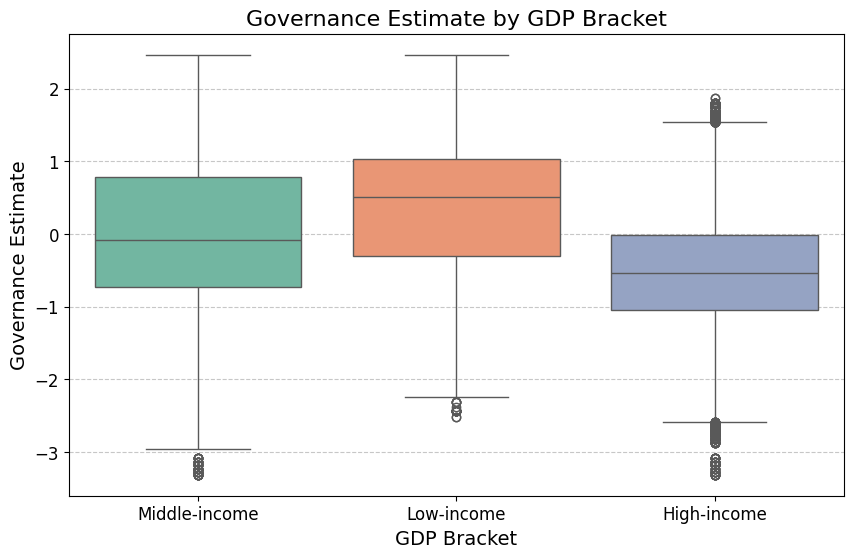

In [40]:
def categorize_gdp(row):
    if row['log_GDP'] <= 20:
        return 'Low-income'
    elif 20 < row['log_GDP'] <= 30:
        return 'Middle-income'
    else:
        return 'High-income'

# Apply the function to create a new column
merged_df['GDP_bracket'] = merged_df.apply(categorize_gdp, axis=1)

# Group by GDP bracket and calculate summary statistics for governance estimate
gdp_bracket_analysis = merged_df.groupby('GDP_bracket')['estimate'].describe()

# Apply the categorization
merged_df['GDP_bracket'] = merged_df.apply(categorize_gdp, axis=1)

# boxplot to visualize governance estimates by GDP bracket
plt.figure(figsize=(10, 6))
sns.boxplot(x='GDP_bracket', y='estimate', data=merged_df, palette='Set2')

# Customize the plot
plt.title('Governance Estimate by GDP Bracket', fontsize=16)
plt.xlabel('GDP Bracket', fontsize=14)
plt.ylabel('Governance Estimate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [41]:
iqr_multiplier = 1.5

# find outliers
def find_outliers(group):
    q1 = group['estimate'].quantile(0.25)
    q3 = group['estimate'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    outliers = group[(group['estimate'] < lower_bound) | (group['estimate'] > upper_bound)]
    return outliers

# Group by GDP bracket and find outliers
outliers_df = merged_df.groupby('GDP_bracket').apply(find_outliers).reset_index(drop=True)

print("Outliers in Governance Estimate by GDP Bracket:")
print(outliers_df[['countryname', 'GDP_bracket', 'estimate', 'GDP', 'log_GDP']])


Outliers in Governance Estimate by GDP Bracket:
       countryname    GDP_bracket  estimate           GDP    log_GDP
0            Chile    High-income  1.542760  2.414101e+13  30.814933
1            Chile    High-income  1.542760  2.077073e+13  30.664566
2            Chile    High-income  1.542760  3.255256e+13  31.113877
3            Chile    High-income  1.542760  2.886148e+13  30.993529
4    United States    High-income  1.873597  1.092911e+13  30.022451
..             ...            ...       ...           ...        ...
627        Somalia  Middle-income -3.083847  1.902324e+12  28.274097
628        Somalia  Middle-income -3.083847  3.205027e+12  28.795742
629        Somalia  Middle-income -3.083847  8.118436e+12  29.725159
630        Somalia  Middle-income -3.083847  7.189128e+12  29.603591
631        Somalia  Middle-income -3.083847  9.510220e+12  29.883388

[632 rows x 5 columns]


<ipython-input-41-604adab16aed>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers_df = merged_df.groupby('GDP_bracket').apply(find_outliers).reset_index(drop=True)


In [42]:
#correlations between governance estimates and GDP
correlation_results = merged_df[['estimate', 'GDP', 'log_GDP']].corr()

# the correlation matrix
print("Correlation Matrix:")
print(correlation_results)


Correlation Matrix:
          estimate       GDP   log_GDP
estimate  1.000000 -0.025331 -0.217914
GDP      -0.025331  1.000000  0.210438
log_GDP  -0.217914  0.210438  1.000000


<ipython-input-50-d0a7cef894bd>:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['region'] = merged_df['countryname'].map(country_to_region)


Unmapped countries: ['Andorra' 'Angola' 'Anguilla' 'Aruba' 'Bermuda' 'Brunei Darussalam'
 'Cayman Islands' 'Cook Islands' "Côte d'Ivoire" 'Greenland' 'Kosovo'
 'North Macedonia' 'Puerto Rico' 'Russian Federation'
 'St. Vincent and the Grenadines' 'Syrian Arab Republic' 'Türkiye'
 'Viet Nam']


<ipython-input-50-d0a7cef894bd>:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='estimate', data=merged_df, palette='Set2')


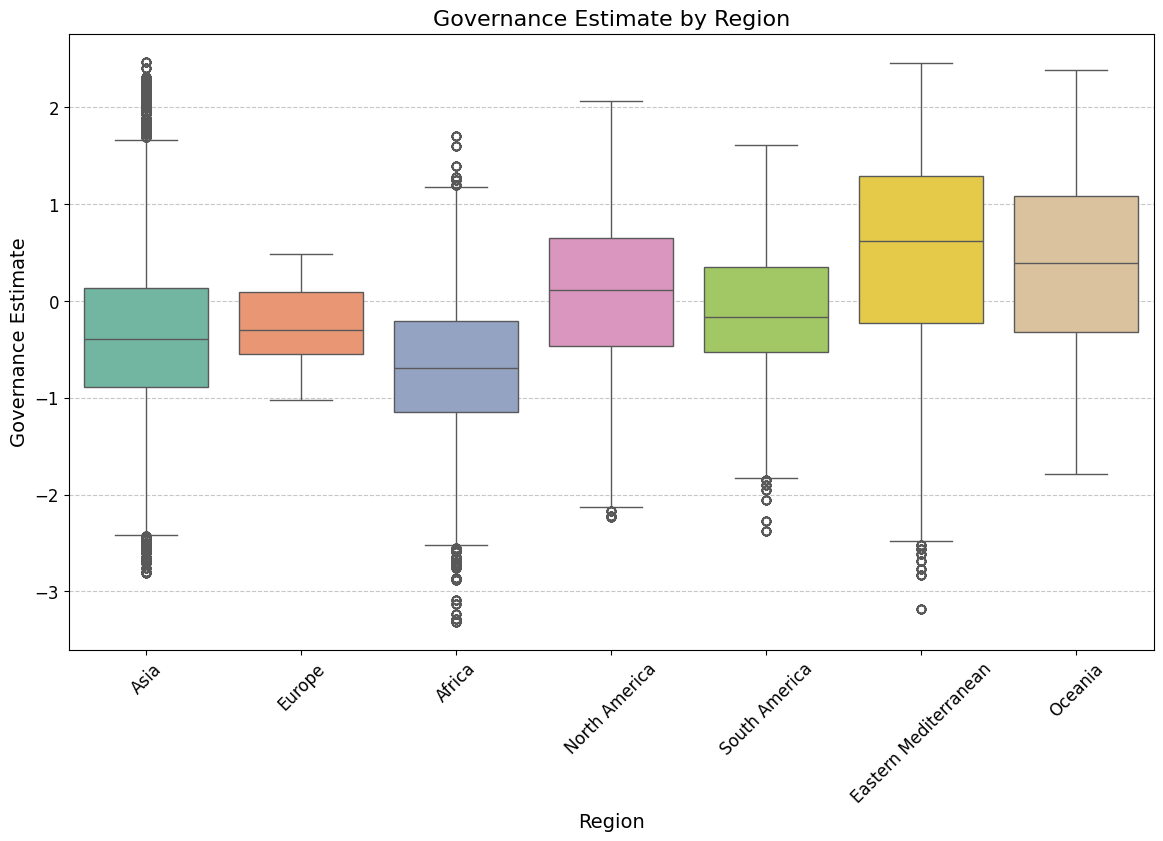

In [50]:
country_to_region = {
    'Afghanistan': 'Asia',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'United States': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Indonesia': 'Asia',
    'Pakistan': 'Asia',
    'Brazil': 'South America',
    'Nigeria': 'Africa',
    'Bangladesh': 'Asia',
    'Russia': 'Europe',
    'Mexico': 'North America',
    'Japan': 'Asia',
    'Ethiopia': 'Africa',
    'Philippines': 'Asia',
    'Egypt': 'Africa',
    'Vietnam': 'Asia',
    'Germany': 'Europe',
    'Ethiopia': 'Africa',
    'Tanzania': 'Africa',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    'Colombia': 'South America',
    'Poland': 'Europe',
    'Argentina': 'South America',
    'Thailand': 'Asia',
    'Ukraine': 'Europe',
    'Canada': 'North America',
    'Morocco': 'Africa',
    'Saudi Arabia': 'Asia',
    'Peru': 'South America',
    'Madagascar': 'Africa',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'Lebanon' : 'Eastern Mediterranean',
    'Antigua and Barbuda' : 'North America',
    'Armenia' : 'Eastern Mediterranean',
    'Azerbaijan' : 'Eastern Mediterranean',
    'Argentina' : 'South America',
    'Australia' : 'Oceania',
    'Austria' : 'Eastern Mediterranean',
    'Bahamas' : 'North America',
    'Bahrain' : 'Eastern Mediterranean',
    'Barbados' : 'North America',
    'Belarus' : 'Eastern Mediterranean',
    'Belgium' : 'Eastern Mediterranean',
    'Belize' : 'North America',
    'Benin' : 'Africa',
    'Bhutan' : 'Asia',
    'Bolivia' : 'South America',
    'Bosnia and Herzegovina' : 'Eastern Mediterranean',
    'Botswana' : 'Africa',
    'Brazil' : 'South America',
    'Brunei' : 'Asia',
    'Bulgaria' : 'Eastern Mediterranean',
    'Burkina Faso' : 'Africa',
    'Burundi' : 'Africa',
    'Cabo Verde' : 'Africa',
    'Cambodia' : 'Asia',
    'Cameroon' : 'Africa',
    'Canada' : 'North America',
    'Central African Republic' : 'Africa',
    'Chad' : 'Africa',
    'Chile' : 'South America',
    'China' : 'Asia',
    'Colombia' : 'South America',
    'Comoros' : 'Africa',
    'Congo' : 'Africa',
    'Costa Rica' : 'North America',
    'Croatia' : 'Eastern Mediterranean',
    'Cuba' : 'North America',
    'Cyprus' : 'Eastern Mediterranean',
    'Czechia' : 'Eastern Mediterranean',
    'Democratic Republic of the Congo' : 'Africa',
    'Denmark' : 'Eastern Mediterranean',
    'Djibouti' : 'Africa',
    'Dominica' : 'North America',
    'Dominican Republic' : 'North America',
    'Ecuador' : 'South America',
    'Egypt' : 'Africa',
    'El Salvador' : 'North America',
    'Equatorial Guinea' : 'Africa',
    'Eritrea' : 'Africa',
    'Estonia' : 'Eastern Mediterranean',
    'Eswatini' : 'Africa',
    'Ethiopia' : 'Africa',
    'Fiji' : 'Oceania',
    'Finland' : 'Eastern Mediterranean',
    'France' : 'Eastern Mediterranean',
    'Gabon' : 'Africa',
    'Gambia' : 'Africa',
    'Georgia' : 'Eastern Mediterranean',
    'Germany' : 'Eastern Mediterranean',
    'Ghana' : 'Africa',
    'Greece' : 'Eastern Mediterranean',
    'Grenada' : 'North America',
    'Guatemala' : 'North America',
    'Guinea' : 'Africa',
    'Guinea-Bissau' : 'Africa',
    'Guyana' : 'South America',
    'Haiti' : 'North America',
    'Honduras' : 'North America',
    'Hungary' : 'Eastern Mediterranean',
    'Iceland' : 'Eastern Mediterranean',
    'India' : 'Asia',
    'Indonesia' : 'Asia',
    'Iran' : 'Eastern Mediterranean',
    'Iraq' : 'Eastern Mediterranean',
    'Ireland' : 'Eastern Mediterranean',
    'Israel' : 'Eastern Mediterranean',
    'Italy' : 'Eastern Mediterranean',
    'Jamaica' : 'North America',
    'Japan' : 'Asia',
    'Jordan' : 'Eastern Mediterranean',
    'Kazakhstan' : 'Eastern Mediterranean',
    'Kenya' : 'Africa',
    'Kiribati' : 'Oceania',
    'Kuwait' : 'Eastern Mediterranean',
    'Kyrgyzstan' : 'Eastern Mediterranean',
    'Laos' : 'Asia',
    'Latvia' : 'Eastern Mediterranean',
    'Lebanon' : 'Eastern Mediterranean',
    'Lesotho' : 'Africa',
    'Liberia' : 'Africa',
    'Libya' : 'Eastern Mediterranean',
    'Liechtenstein' : 'Eastern Mediterranean',
    'Lithuania' : 'Eastern Mediterranean',
    'Luxembourg' : 'Eastern Mediterranean',
    'Madagascar' : 'Africa',
    'Malawi' : 'Africa',
    'Malaysia' : 'Asia',
    'Maldives' : 'Asia',
    'Mali' : 'Africa',
    'Malta' : 'Eastern Mediterranean',
    'Marshall Islands' : 'Oceania',
    'Mauritania' : 'Africa',
    'Mauritius' : 'Africa',
    'Mexico' : 'North America',
    'Micronesia' : 'Oceania',
    'Moldova' : 'Eastern Mediterranean',
    'Monaco' : 'Eastern Mediterranean',
    'Mongolia' : 'Asia',
    'Montenegro' : 'Eastern Mediterranean',
    'Morocco' : 'Africa',
    'Mozambique' : 'Africa',
    'Myanmar' : 'Asia',
    'Namibia' : 'Africa',
    'Nauru' : 'Oceania',
    'Nepal' : 'Asia',
    'Netherlands' : 'Eastern Mediterranean',
    'New Zealand' : 'Oceania',
    'Nicaragua' : 'North America',
    'Niger' : 'Africa',
    'Nigeria' : 'Africa',
    'North Korea' : 'Asia',
    'Norway' : 'Eastern Mediterranean',
    'Oman' : 'Eastern Mediterranean',
    'Pakistan' : 'Asia',
    'Palau' : 'Oceania',
    'Panama' : 'North America',
    'Papua New Guinea' : 'Oceania',
    'Paraguay' : 'South America',
    'Peru' : 'South America',
    'Philippines' : 'Asia',
    'Poland' : 'Eastern Mediterranean',
    'Portugal' : 'Eastern Mediterranean',
    'Qatar' : 'Eastern Mediterranean',
    'Romania' : 'Eastern Mediterranean',
    'Russia' : 'Eastern Mediterranean',
    'Rwanda' : 'Africa',
    'Saint Kitts and Nevis' : 'North America',
    'Saint Lucia' : 'North America',
    'Saint Vincent and the Grenadines' : 'North America',
    'Samoa' : 'Oceania',
    'San Marino' : 'Eastern Mediterranean',
    'Sao Tome and Principe' : 'Africa',
    'Saudi Arabia' : 'Eastern Mediterranean',
    'Senegal' : 'Africa',
    'Serbia' : 'Eastern Mediterranean',
    'Seychelles' : 'Africa',
    'Sierra Leone' : 'Africa',
    'Singapore' : 'Asia',
    'Slovakia' : 'Eastern Mediterranean',
    'Slovenia' : 'Eastern Mediterranean',
    'Solomon Islands' : 'Oceania',
    'Somalia' : 'Africa',
    'South Africa' : 'Africa',
    'South Korea' : 'Asia',
    'South Sudan' : 'Africa',
    'Spain' : 'Eastern Mediterranean',
    'Sri Lanka' : 'Asia',
    'Sudan' : 'Africa',
    'Suriname' : 'South America',
    'Swaziland' : 'Africa',
    'Sweden' : 'Eastern Mediterranean',
    'Switzerland' : 'Eastern Mediterranean',
    'Syria' : 'Eastern Mediterranean',
    'Tajikistan' : 'Eastern Mediterranean',
    'Tanzania' : 'Africa',
    'Thailand' : 'Asia',
    'Timor-Leste' : 'Asia',
    'Togo' : 'Africa',
    'Tonga' : 'Oceania',
    'Trinidad and Tobago' : 'North America',
    'Tunisia' : 'Eastern Mediterranean',
    'Turkey' : 'Eastern Mediterranean',
    'Turkmenistan' : 'Eastern Mediterranean',
    'Tuvalu' : 'Oceania',
    'Uganda' : 'Africa',
    'Ukraine' : 'Eastern Mediterranean',
    'United Arab Emirates' : 'Eastern Mediterranean',
    'United Kingdom' : 'Eastern Mediterranean',
    'United States' : 'North America',
    'Uruguay' : 'South America',
    'Uzbekistan' : 'Eastern Mediterranean',
    'Vanuatu' : 'Oceania',
    'Venezuela' : 'South America',
    'Vietnam' : 'Asia',
    'Yemen' : 'Eastern Mediterranean',
    'Zambia' : 'Africa',
    'Zimbabwe' : 'Africa'

}

# 'region' column based on countryname
merged_df['region'] = merged_df['countryname'].map(country_to_region)

# unmapped countries
unmapped_countries = merged_df[merged_df['region'].isnull()]['countryname'].unique()
print("Unmapped countries:", unmapped_countries)

country_region_df = merged_df

# visualize governance estimates by region
import matplotlib.pyplot as plt
import seaborn as sns

if 'region' in merged_df.columns:
    # boxplot for governance estimates by region
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='region', y='estimate', data=merged_df, palette='Set2')


    plt.title('Governance Estimate by Region', fontsize=16)
    plt.xlabel('Region', fontsize=14)
    plt.ylabel('Governance Estimate', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)


    plt.show()
else:
    print("The 'region' column is not available in the dataset.")


***Asia***

Wide range of governance scores.
Some countries have very poor governance (outliers below -3), but others perform well.

***Europe***

Scores are concentrated, meaning most countries have similar governance levels.
Median governance is slightly below 0, with fewer extreme outliers.

***Africa***

Governance tends to be lower overall, with many countries scoring below -1.
Several outliers indicate very poor governance.

***North and South America***

Median governance is higher, around 0 or slightly above, showing relatively better governance compared to other regions.

***Eastern Mediterranean and Oceania***

These regions show a wide spread in governance scores, with some countries performing very well and others poorly.


# To do:

1. Analysing governance over time
2. Comparing Regions for Governance Variability
3. Identifying the Best and Worst Performers
4. Correlating Governance with Economic Indicators
5. Exploring Governance Disparities Within Regions

# Time series analysis

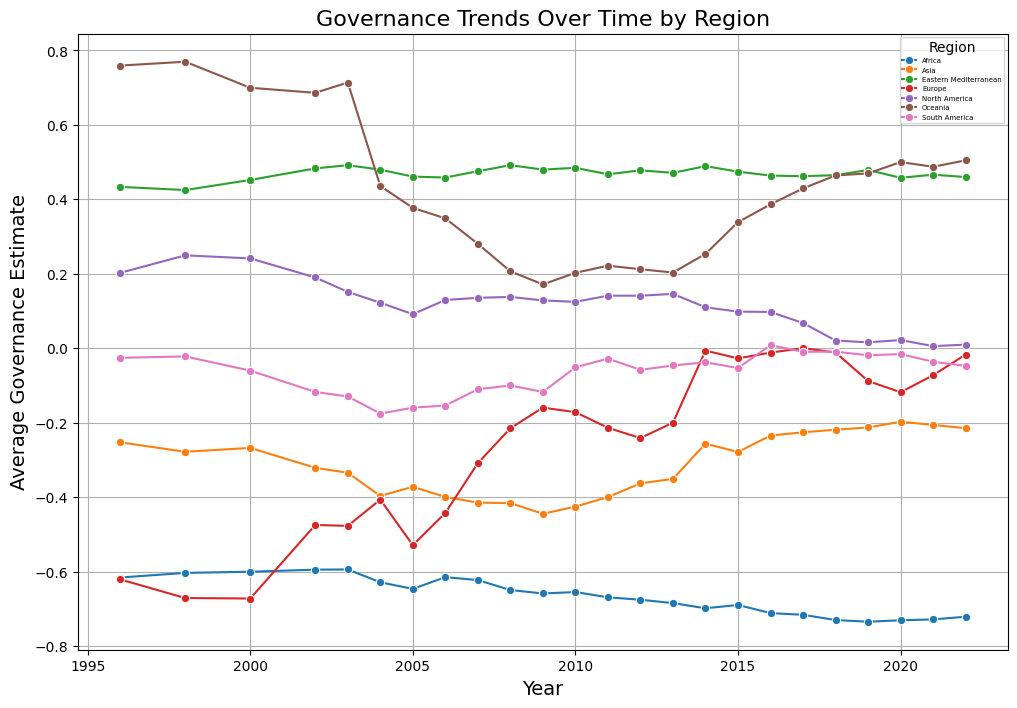

In [52]:
# Group by year and region to calculate average governance estimates
governance_trends = country_region_df.groupby(['year', 'region'])['estimate'].mean().reset_index()

# Plot governance trends over time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(data=governance_trends, x='year', y='estimate', hue='region', marker='o')

# Customize the plot
plt.title('Governance Trends Over Time by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Governance Estimate', fontsize=14)
plt.legend(title='Region', fontsize=5)
plt.grid(True)
plt.show()




1.  Europe and North America are leaders in governance, maintaining consistently high scores.
2. Africa and Eastern Mediterranean regions face significant challenges, with governance estimates remaining low.
3. Asia shows promising improvements, while Oceania and South America display slight declines over the years.



2. Compare Regions for Governance Variability

In [55]:
# governance variability (standard deviation) by region
governance_variability = country_region_df.groupby('region')['estimate'].std().reset_index()
governance_variability.columns = ['Region', 'Governance Variability']

# sort and display the variability
governance_variability.sort_values(by='Governance Variability', ascending=False, inplace=True)
print(governance_variability)


                  Region  Governance Variability
2  Eastern Mediterranean                1.028622
1                   Asia                0.908187
5                Oceania                0.872281
4          North America                0.810408
0                 Africa                0.710373
6          South America                0.654899
3                 Europe                0.370031


3. Identify the Best and Worst Performers


In [59]:
# Group by countryname and calculate the average governance estimate
country_avg_scores = country_region_df.groupby(['countryname', 'region'])['estimate'].mean().reset_index()

# Find the top 10 performers
top_performers = country_avg_scores.sort_values(by='estimate', ascending=False).head(10)

# Find the worst 10 performers
worst_performers = country_avg_scores.sort_values(by='estimate').head(10)

# Display the results
print("Top 10 Performers:")
print(top_performers)

print("\nWorst 10 Performers:")
print(worst_performers)


Top 10 Performers:
     countryname                 region  estimate
48       Finland  Eastern Mediterranean  1.818196
36       Denmark  Eastern Mediterranean  1.765897
105  New Zealand                Oceania  1.759693
141  Switzerland  Eastern Mediterranean  1.726397
109       Norway  Eastern Mediterranean  1.715618
140       Sweden  Eastern Mediterranean  1.705270
84    Luxembourg  Eastern Mediterranean  1.692084
104  Netherlands  Eastern Mediterranean  1.665639
25        Canada          North America  1.591449
63       Iceland  Eastern Mediterranean  1.584091

Worst 10 Performers:
                  countryname                 region  estimate
133                   Somalia                 Africa -2.123284
135               South Sudan                 Africa -1.864183
0                 Afghanistan                   Asia -1.659987
138                     Sudan                 Africa -1.585530
66                       Iraq  Eastern Mediterranean -1.564859
100                   Myanmar  

4. Correlate Governance with Economic Indicators


In [57]:
# Correlate governance scores with GDP
correlation_results = country_region_df[['estimate', 'GDP', 'log_GDP']].corr()
print("Correlation Results:")
print(correlation_results)


Correlation Results:
          estimate       GDP   log_GDP
estimate  1.000000 -0.025331 -0.217914
GDP      -0.025331  1.000000  0.210438
log_GDP  -0.217914  0.210438  1.000000


5. Explore Governance Disparities Within Regions


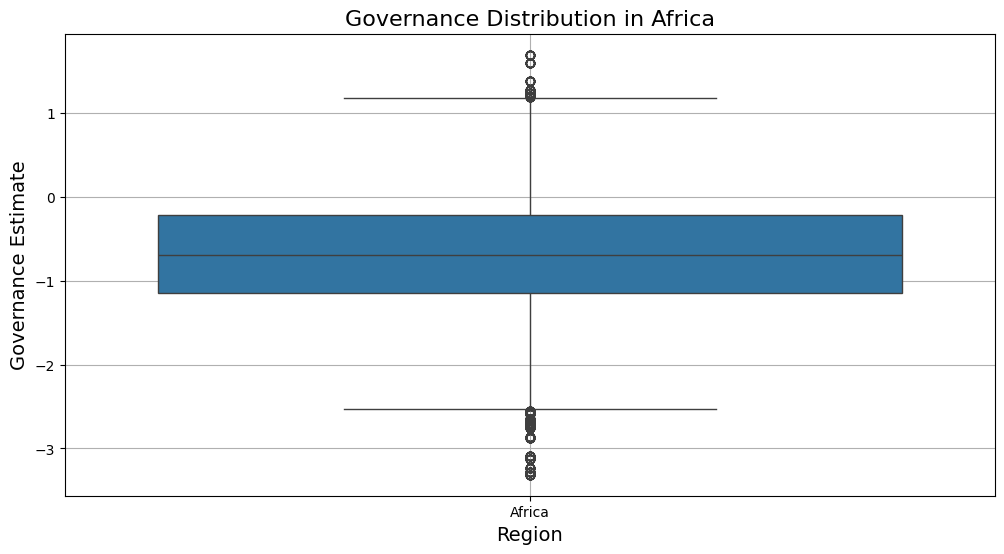

In [58]:
# Subset data for Africa and plot governance distribution
africa_data = country_region_df[country_region_df['region'] == 'Africa']

plt.figure(figsize=(12, 6))
sns.boxplot(data=africa_data, x='region', y='estimate')
plt.title('Governance Distribution in Africa', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Governance Estimate', fontsize=14)
plt.grid(True)
plt.show()


# Time series analysis

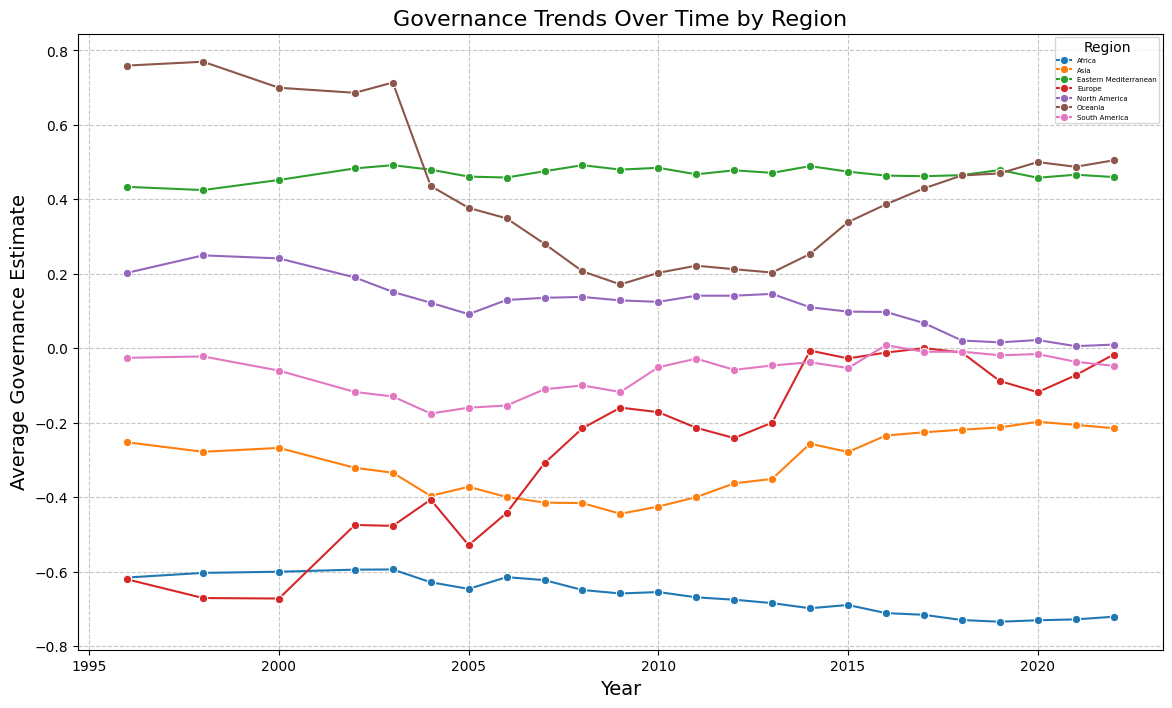

   year                 region  estimate
0  1996                 Africa -0.616064
1  1996                   Asia -0.252793
2  1996  Eastern Mediterranean  0.433437
3  1996                 Europe -0.621050
4  1996          North America  0.202443


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# group by year and region to calculate average governance estimates
regional_governance_trends = country_region_df.groupby(['year', 'region'])['estimate'].mean().reset_index()

# visualize the trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(data=regional_governance_trends, x='year', y='estimate', hue='region', marker='o')


plt.title('Governance Trends Over Time by Region', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Governance Estimate', fontsize=14)
plt.legend(title='Region', fontsize=5)
plt.grid(True, linestyle='--', alpha=0.7)


plt.show()

# regional trends for review
print(regional_governance_trends.head())


regional_governance_trends.to_csv('regional_governance_trends.csv', index=False)
